In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
# sns.set()
sns.set_context("talk")
sns.set_context("notebook", font_scale=1.5)

In [2]:
def load_data(dataset_dir, start=1, end=110):
	columns = ["Tp7.", "Af7.", "Af8.", "Tp8."]
	# initial empty data arrays
	data_inter	= pd.DataFrame()
	for j in range(start, end):
		if (j == 89):
			continue
		# get directory name for one subject
		data_dir = dataset_dir+"S"+format(j, '03d')
		# get task list for one subject
		task_list = [task for task in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, task))]
		for task in task_list:
			if(("R02" in task) or ("R04" in task) or ("R06" in task)): # R02: eye closed; R04, R06: motor imagery tasks
				print("Processing: " + task)
				# get data file name and label file name
				data_file 	= data_dir+"/"+task+"/"+task+".csv"
				label_file 	= data_dir+"/"+task+"/"+task+".label.csv"
				# read data and label
				data		= pd.read_csv(data_file, usecols=columns)
				label		= pd.read_csv(label_file)
				# remove rest label and data during motor imagery tasks
				data = pd.concat([data, label], axis=1)
				data = data[data['labels']!= 'rest']
# 				data["labels"] = data["labels"].astype("<U32")
				data_inter = pd.concat([data_inter, data], axis=0)
			else:
				pass    
	return data_inter
df = load_data("./dataset/raw_dataset/", 1, 109)

Processing: S001R06
Processing: S001R04
Processing: S001R02
Processing: S002R02
Processing: S002R06
Processing: S002R04
Processing: S003R04
Processing: S003R06
Processing: S003R02
Processing: S004R06
Processing: S004R02
Processing: S004R04
Processing: S005R02
Processing: S005R04
Processing: S005R06
Processing: S006R02
Processing: S006R04
Processing: S006R06
Processing: S007R02
Processing: S007R06
Processing: S007R04
Processing: S008R02
Processing: S008R04
Processing: S008R06
Processing: S009R06
Processing: S009R04
Processing: S009R02
Processing: S010R04
Processing: S010R02
Processing: S010R06
Processing: S011R02
Processing: S011R04
Processing: S011R06
Processing: S012R04
Processing: S012R02
Processing: S012R06
Processing: S013R04
Processing: S013R06
Processing: S013R02
Processing: S014R04
Processing: S014R02
Processing: S014R06
Processing: S015R04
Processing: S015R06
Processing: S015R02
Processing: S016R06
Processing: S016R04
Processing: S016R02
Processing: S017R04
Processing: S017R06


In [3]:
df.head()

,Af7.,Af8.,Tp7.,Tp8.,labels
672,53.0,51.0,34.0,22.0,image_open&close_both_feet
673,52.0,48.0,27.0,29.0,image_open&close_both_feet
674,44.0,44.0,36.0,40.0,image_open&close_both_feet
675,52.0,37.0,55.0,46.0,image_open&close_both_feet
676,43.0,15.0,39.0,44.0,image_open&close_both_feet


In [5]:
df.columns = ["AF7", "AF8", "TP7", "TP8", "labels"]
df = df[["TP7","AF7","AF8","TP8","labels"]]
df.head()

,TP7,AF7,AF8,TP8,labels
672,34.0,53.0,51.0,22.0,image_open&close_both_feet
673,27.0,52.0,48.0,29.0,image_open&close_both_feet
674,36.0,44.0,44.0,40.0,image_open&close_both_feet
675,55.0,52.0,37.0,46.0,image_open&close_both_feet
676,39.0,43.0,15.0,44.0,image_open&close_both_feet


In [4]:
df.shape

(3115720, 5)

In [6]:
df["labels"].unique()

array(['image_open&close_both_feet', 'image_open&close_both_fists',
       'image_open&close_right_fist', 'image_open&close_left_fist',
       'eye_close'], dtype=object)

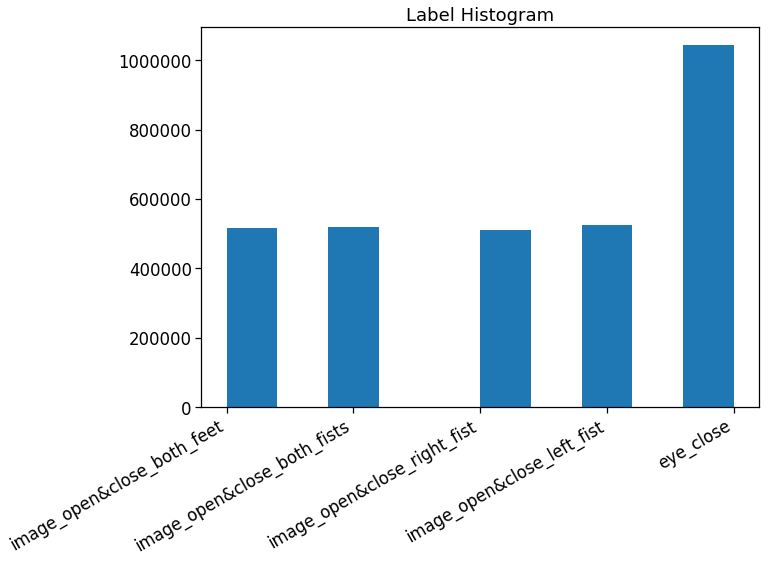

In [7]:
plt.figure(figsize=(10, 7))
ax = plt.subplot()
plt.hist(df["labels"].values.astype("<U32"))
ax.set_title('Label Histogram')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.savefig("./images/hist_labels", bbox_inches = "tight")
plt.show()

In [35]:
for i in df["labels"].unique():
    plt.figure(figsize=(10, 7))
    sns.pairplot(df[df["labels"] == i], vars=["TP7", "AF7", "AF8", "TP8"], hue="labels", diag_kind="kde")
#     plt.savefig("./images/pairplot_label_" + str(i), bbox_inches = "tight")
    # sns.pairplot(df, hue="labels", diag_kind="hist", vars=["TP9", "AF7", "AF8", "TP10"])
    plt.savefig("./images/pairplot_labels_" + i, bbox_inches = "tight")
    # plt.legend(["a", "b", "c", "d", "e"])
#     plt.show()
    plt.clf()

<Figure size 720x504 with 0 Axes>

<Figure size 1022.27x720 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 1023.77x720 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 1016.52x720 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 1004.65x720 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 860.025x720 with 0 Axes>

In [11]:
df_corr = df.corr(method="pearson")

In [12]:
df_corr

,TP7,AF7,AF8,TP8
TP7,1.000000,0.420883,0.321969,0.541313
AF7,0.420883,1.000000,0.730152,0.327677
AF8,0.321969,0.730152,1.000000,0.389574
TP8,0.541313,0.327677,0.389574,1.000000


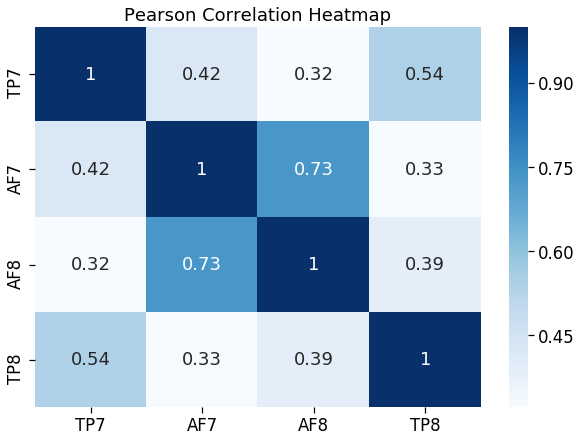

In [13]:
# sns.heatmap(df_corr, annot=True, cmap="binary");
plt.figure(figsize=(10, 7))
plt.title("Pearson Correlation Heatmap")
sns.heatmap(df_corr, annot=True, cmap="Blues")
plt.savefig("./images/corr.png", bbox_inches="tight")
plt.show()

<Figure size 720x504 with 0 Axes>

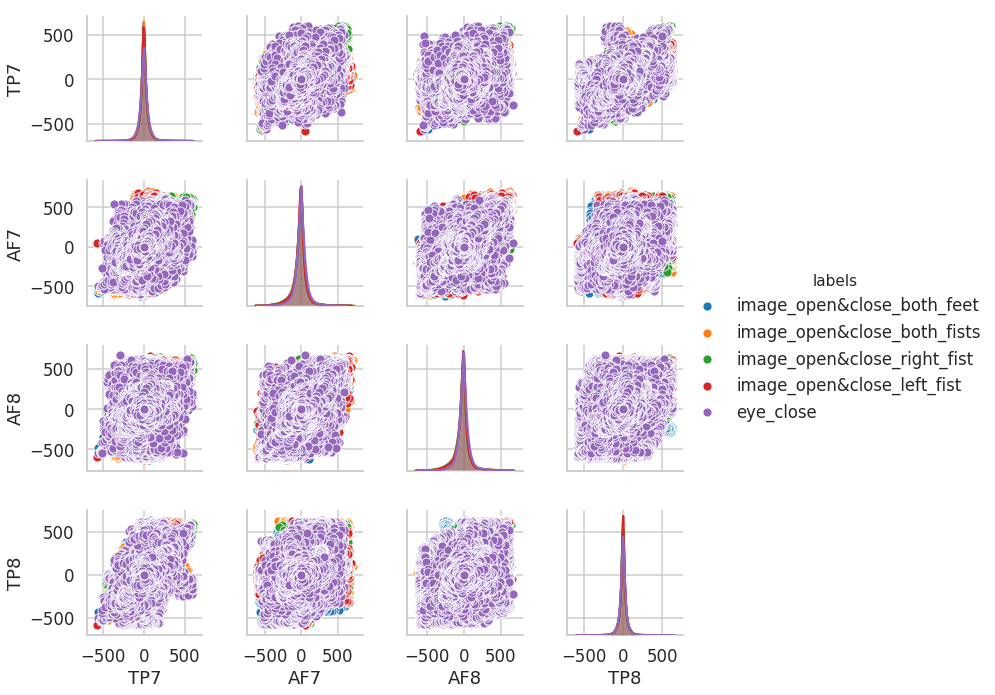

In [39]:
plt.figure(figsize=(10, 7))
sns.pairplot(df, hue="labels", vars=["TP7", "AF7", "AF8", "TP8"], diag_kind="kde")
plt.savefig("./images/pairplot.png", bbox_inches = "tight")
# sns.pairplot(df, hue="labels", diag_kind="hist", vars=["TP9", "AF7", "AF8", "TP10"])
# plt.savefig("./images/pairplot_labels.png", bbox_inches = "tight")
# plt.legend(["a", "b", "c", "d", "e"])
plt.show()

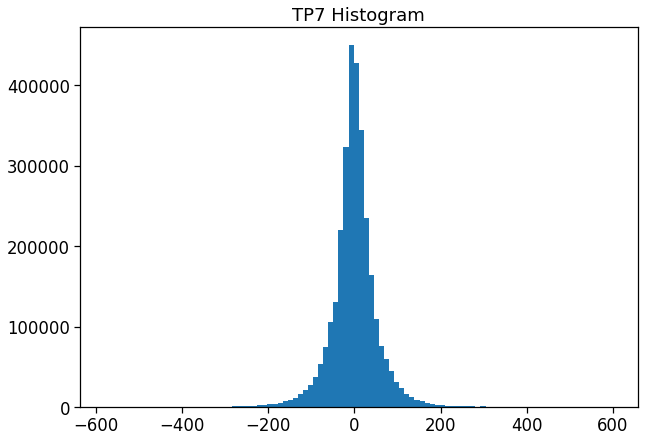

In [26]:
plt.figure(figsize=(10, 7))
plt.hist(df["TP7"], bins=100)
plt.title("TP7 Histogram")
plt.savefig("./images/hist_tp7.png", bbox_inches = "tight")
plt.show()

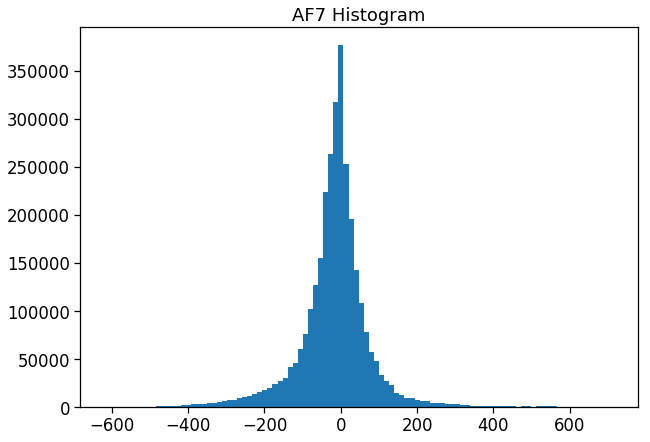

In [27]:
plt.figure(figsize=(10, 7))
plt.hist(df["AF7"], bins=100)
plt.title("AF7 Histogram")
plt.savefig("./images/hist_af7.png", bbox_inches = "tight")
plt.show()

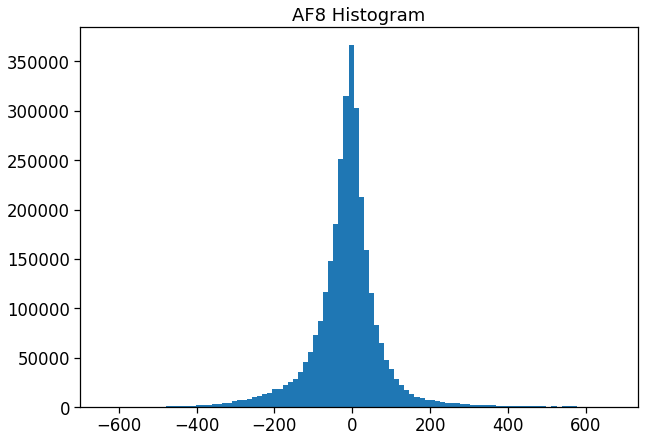

In [28]:
plt.figure(figsize=(10, 7))
plt.hist(df["AF8"], bins=100)
plt.title("AF8 Histogram")
plt.savefig("./images/hist_af8.png", bbox_inches = "tight")
plt.show()

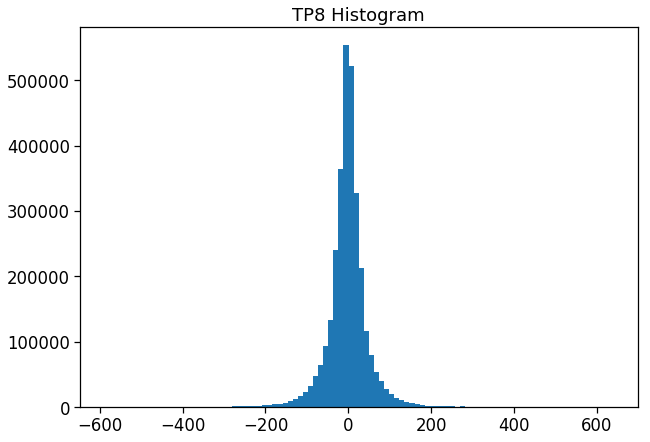

In [29]:
plt.figure(figsize=(10, 7))
plt.hist(df["TP8"], bins=100)
plt.title("TP8 Histogram")
plt.savefig("./images/hist_tp8.png", bbox_inches = "tight")
plt.show()